# Data Quality report

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from scipy.stats import zscore

# Load and preprocess data
df = pd.read_csv('oasis_longitudinal.csv', na_filter=False) 
df

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2,27,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2,30,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,,23,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,,28,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,,22,0.5,1698,0.701,1.034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,OAS2_0185,OAS2_0185_MR2,Demented,2,842,M,R,82,16,1,28,0.5,1693,0.694,1.037
369,OAS2_0185,OAS2_0185_MR3,Demented,3,2297,M,R,86,16,1,26,0.5,1688,0.675,1.040
370,OAS2_0186,OAS2_0186_MR1,Nondemented,1,0,F,R,61,13,2,30,0.0,1319,0.801,1.331
371,OAS2_0186,OAS2_0186_MR2,Nondemented,2,763,F,R,63,13,2,30,0.0,1327,0.796,1.323


In [2]:
print(df.describe())

            Visit     MR Delay         Age        EDUC         CDR  \
count  373.000000   373.000000  373.000000  373.000000  373.000000   
mean     1.882038   595.104558   77.013405   14.597855    0.290885   
std      0.922843   635.485118    7.640957    2.876339    0.374557   
min      1.000000     0.000000   60.000000    6.000000    0.000000   
25%      1.000000     0.000000   71.000000   12.000000    0.000000   
50%      2.000000   552.000000   77.000000   15.000000    0.000000   
75%      2.000000   873.000000   82.000000   16.000000    0.500000   
max      5.000000  2639.000000   98.000000   23.000000    2.000000   

              eTIV        nWBV         ASF  
count   373.000000  373.000000  373.000000  
mean   1488.128686    0.729568    1.195461  
std     176.139286    0.037135    0.138092  
min    1106.000000    0.644000    0.876000  
25%    1357.000000    0.700000    1.099000  
50%    1470.000000    0.729000    1.194000  
75%    1597.000000    0.756000    1.293000  
max    20

In [3]:
#data quality report
#Missing values
missing_vals = df.isnull().sum()
print("Missing values:\n", missing_vals)

Missing values:
 Subject ID    0
MRI ID        0
Group         0
Visit         0
MR Delay      0
M/F           0
Hand          0
Age           0
EDUC          0
SES           0
MMSE          0
CDR           0
eTIV          0
nWBV          0
ASF           0
dtype: int64


In [4]:
# data quality report for categorical features
categorical_feat = ['Group', 'M/F', 'Hand']
categorical_data_qual = pd.DataFrame(index=categorical_feat, columns=['Count', 'Unique', 'Top', 'Freq'])

# This code will pull the count for each categorical feature and report the unique values
# Will also pull most occuring value for each feature and its frequency
for feature in categorical_feat:
    categorical_data_qual.loc[feature] = [df[feature].count(), df[feature].nunique(), df[feature].mode().iloc[0], df[feature].value_counts().max()]
print("Data Quality Report for Categorical Features:\n", categorical_data_qual)

Data Quality Report for Categorical Features:
       Count Unique          Top Freq
Group   373      3  Nondemented  190
M/F     373      2            F  213
Hand    373      1            R  373


In [5]:
# data quality report for continuous features
continuous_feat = ['Visit', 'MR Delay', 'Age', 'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF']
continuous_data_qual = pd.DataFrame(index=continuous_feat, columns=['Count', 'Unique', 'Mode', 'Max Count'])

# This code will pull the count for each contiuous feature and report the unique values
# Will also pull most occuring value for each feature and its frequency
for feature in continuous_feat:
    continuous_data_qual.loc[feature] = [df[feature].count(), df[feature].nunique(), df[feature].mode().iloc[0], df[feature].value_counts().max()]

print("Data Quality Report for Continuous Features:\n", continuous_data_qual)

Data Quality Report for Continuous Features:
          Count Unique   Mode Max Count
Visit      373      5      1       150
MR Delay   373    201      0       150
Age        373     39     73        26
EDUC       373     12     12       103
SES        373      6      2       103
MMSE       373     19     30       114
CDR        373      4    0.0       206
eTIV       373    286   1475         4
nWBV       373    136  0.696        10
ASF        373    265  1.184         5


# Data Visualization

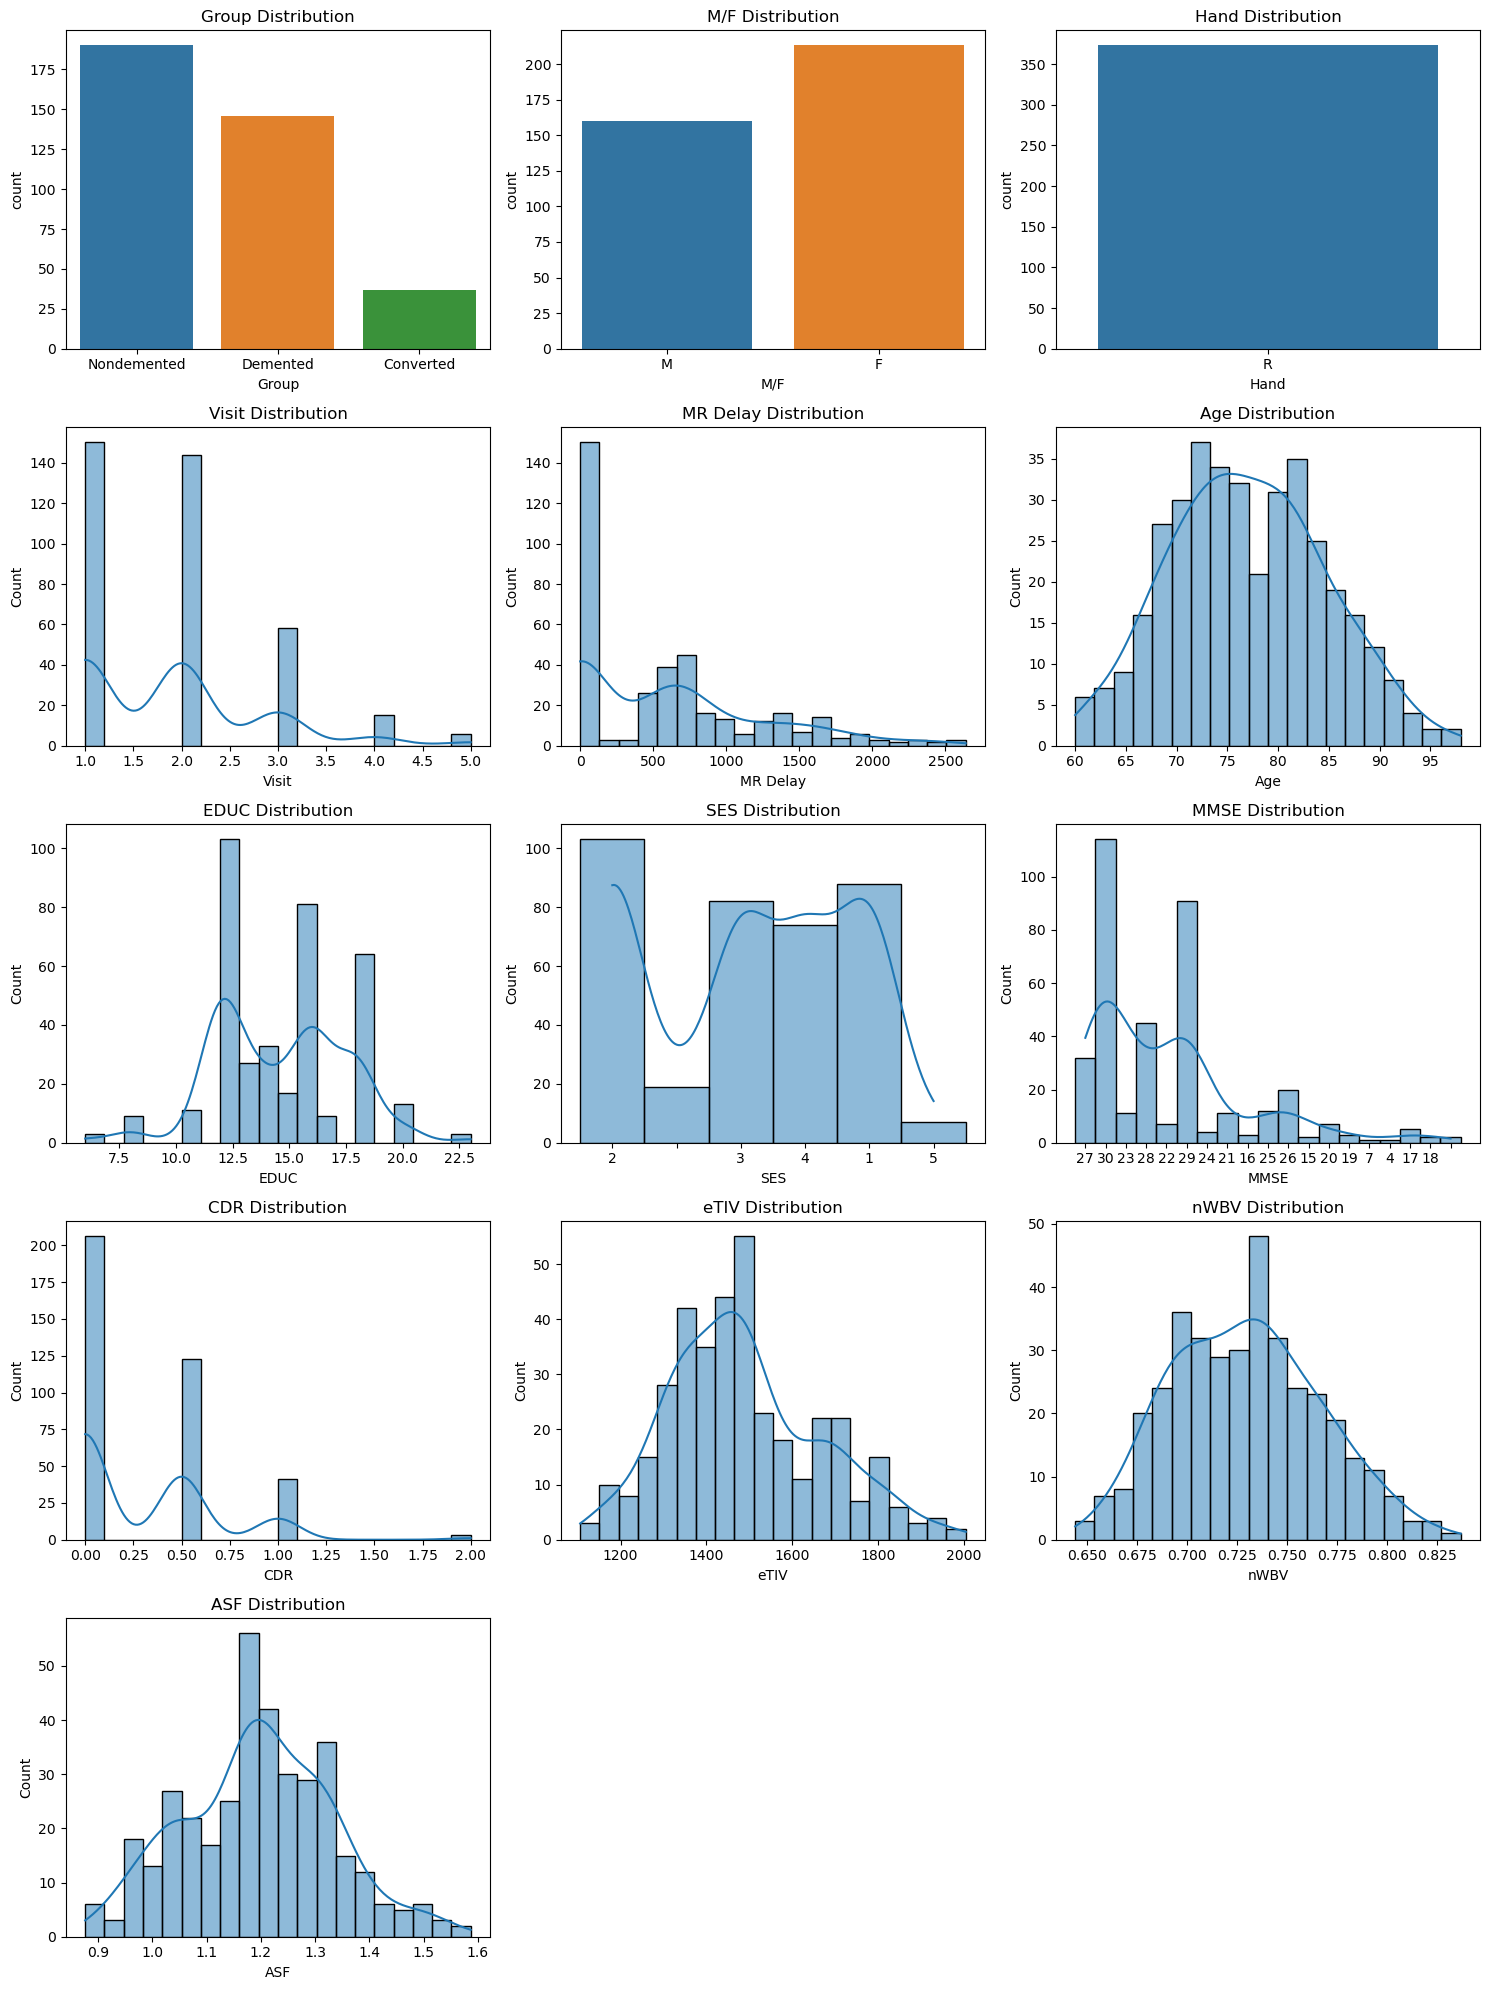

In [6]:
import math

# Determine the number of rows and columns based on the total number of features
total_features = len(categorical_feat) + len(continuous_feat)
rows = math.ceil(total_features / 3)  # Assuming 3 columns

# Set up the figure
plt.figure(figsize=(15, 4 * rows))

# Plot histograms for categorical features
for i, feature in enumerate(categorical_feat, 1):
    plt.subplot(rows, 3, i)
    sns.countplot(x=feature, data=df)
    plt.title(f'{feature} Distribution')

# Plot histograms for continuous features
for i, feature in enumerate(continuous_feat, 1):
    plt.subplot(rows, 3, i + len(categorical_feat))
    sns.histplot(df[feature], bins=20, kde=True)
    plt.title(f'{feature} Distribution')

# Adjust layout
plt.tight_layout()
plt.show()

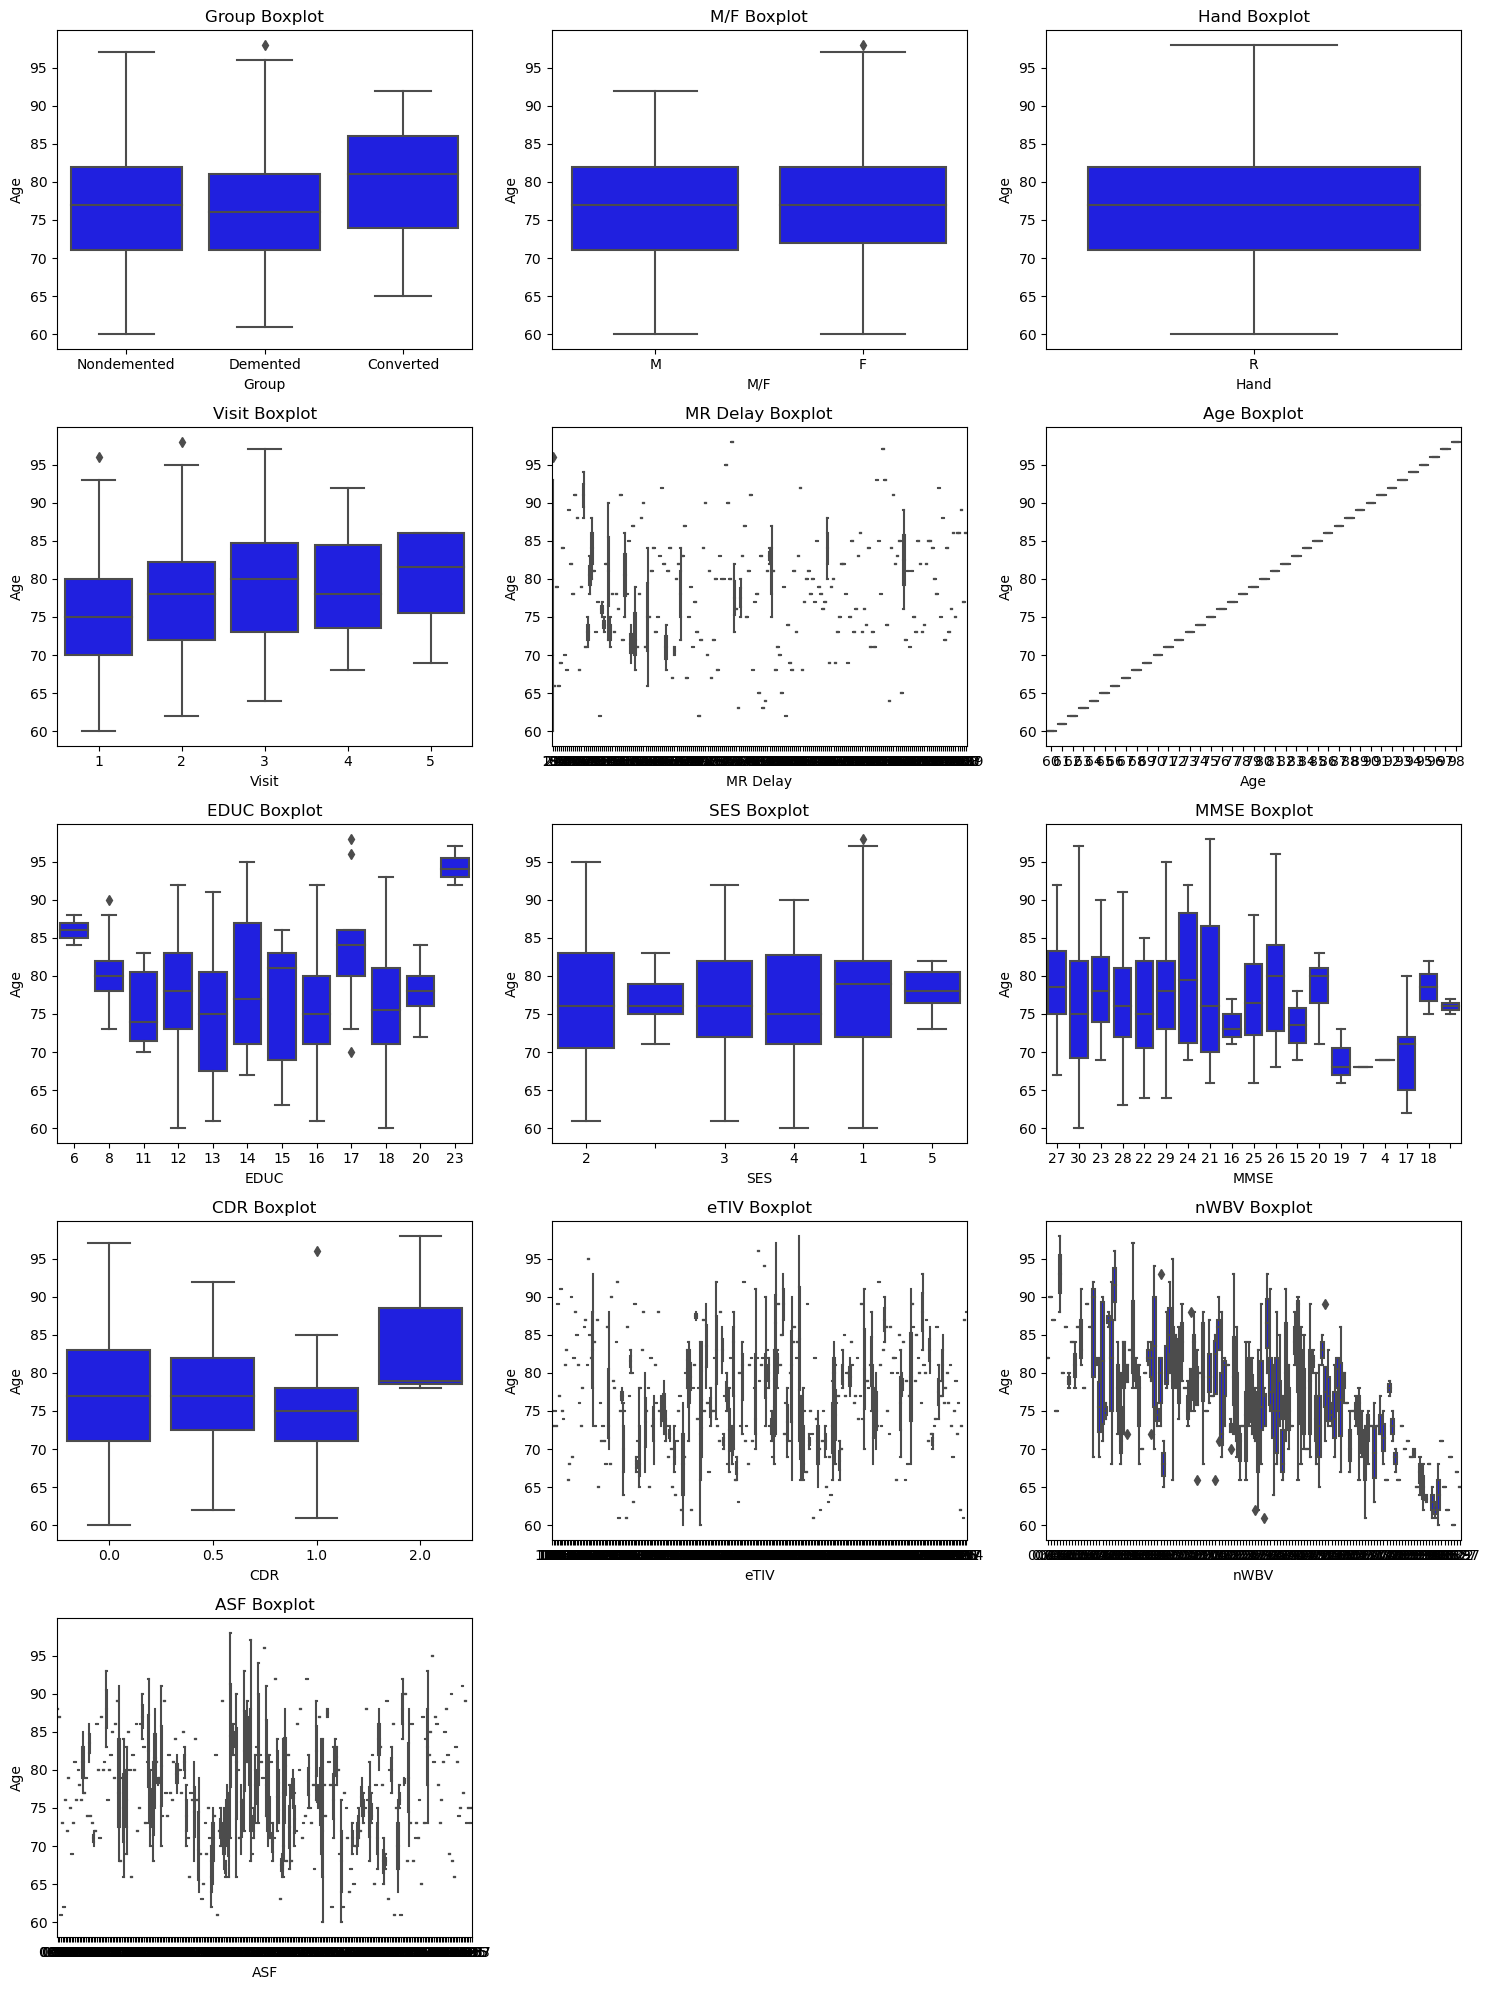

In [7]:
# Determine the number of rows and columns based on the total number of features
total_features = len(categorical_feat) + len(continuous_feat)
rows = math.ceil(total_features / 3)  # Assuming 3 columns

# Set up the figure
plt.figure(figsize=(15, 4 * rows))

# Boxplots for categorical features
for i, feature in enumerate(categorical_feat, 1):
    plt.subplot(rows, 3, i)
    sns.boxplot(x=feature, y='Age', data=df, color='blue')  # Adjust 'Age' as needed, and set color if desired
    plt.title(f'{feature} Boxplot')

# Boxplots for continuous features
for i, feature in enumerate(continuous_feat, 1):
    plt.subplot(rows, 3, i + len(categorical_feat))
    sns.boxplot(x=feature, y='Age', data=df, color='blue')  # Adjust 'Age' as needed, and set color if desired
    plt.title(f'{feature} Boxplot')

# Adjust layout
plt.tight_layout()
plt.show()

# Normalization of Original Dataset

In [8]:
from scipy.stats import zscore
from sklearn.preprocessing import MinMaxScaler

# Step 1: Handle missing values
normalized_df = df.copy()

# Convert non-numeric values in continuous features to numeric
normalized_df[continuous_feat] = normalized_df[continuous_feat].apply(pd.to_numeric, errors='coerce')

# Check for NaN values after conversion
print("NaN values after conversion:\n", normalized_df.isnull().sum())

# Fill NaN values with the mean

# Step 2: Min-Max Scaling (Normalization)
scaler = MinMaxScaler()
normalized_df[continuous_feat] = scaler.fit_transform(normalized_df[continuous_feat])

# Print updated statistics after normalization (without outlier removal)
print(normalized_df.describe())


NaN values after conversion:
 Subject ID     0
MRI ID         0
Group          0
Visit          0
MR Delay       0
M/F            0
Hand           0
Age            0
EDUC           0
SES           19
MMSE           2
CDR            0
eTIV           0
nWBV           0
ASF            0
dtype: int64
            Visit    MR Delay         Age        EDUC         SES        MMSE  \
count  373.000000  373.000000  373.000000  373.000000  354.000000  371.000000   
mean     0.220509    0.225504    0.447721    0.505756    0.365113    0.897781   
std      0.230711    0.240805    0.201078    0.169196    0.283501    0.141663   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.289474    0.352941    0.250000    0.884615   
50%      0.250000    0.209170    0.447368    0.529412    0.250000    0.961538   
75%      0.250000    0.330807    0.578947    0.588235    0.500000    1.000000   
max      1.000000    1.000000    1.000000    1.000000 

In [9]:
normalized_df
normalized_df.to_csv('normalized_results.csv', index=False)
 

# Imputation and Outliers

In [10]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

# Step 1: Handle missing values
imputed_df = df.copy()

# Convert non-numeric values in continuous features to numeric
imputed_df[continuous_feat] = imputed_df[continuous_feat].apply(pd.to_numeric, errors='coerce')

# Check for NaN values after conversion
print("NaN values after conversion:\n", imputed_df.isnull().sum())

# Impute missing values with the median
imputer = SimpleImputer(strategy='median')
imputed_df[continuous_feat] = imputer.fit_transform(imputed_df[continuous_feat])

# Step 2: Outlier Removal
outlier_threshold = 3  # Adjust this threshold based on your data distribution
imputed_df = imputed_df[(np.abs(zscore(imputed_df[continuous_feat])) < outlier_threshold).all(axis=1)]

# Rest of the code remains the same

# Print updated statistics after outlier removal
print(imputed_df.describe())

NaN values after conversion:
 Subject ID     0
MRI ID         0
Group          0
Visit          0
MR Delay       0
M/F            0
Hand           0
Age            0
EDUC           0
SES           19
MMSE           2
CDR            0
eTIV           0
nWBV           0
ASF            0
dtype: int64
            Visit     MR Delay         Age        EDUC         SES  \
count  358.000000   358.000000  358.000000  358.000000  358.000000   
mean     1.812849   559.072626   76.941341   14.586592    2.432961   
std      0.830883   597.089782    7.599898    2.893446    1.099899   
min      1.000000     0.000000   60.000000    6.000000    1.000000   
25%      1.000000     0.000000   71.000000   12.000000    2.000000   
50%      2.000000   521.500000   77.000000   15.000000    2.000000   
75%      2.000000   845.000000   82.000000   16.000000    3.000000   
max      4.000000  2297.000000   97.000000   23.000000    5.000000   

             MMSE         CDR         eTIV        nWBV         ASF  
co

In [11]:
imputed_df

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1.0,0.0,M,R,87.0,14.0,2.0,27.0,0.0,1987.0,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2.0,457.0,M,R,88.0,14.0,2.0,30.0,0.0,2004.0,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1.0,0.0,M,R,75.0,12.0,2.0,23.0,0.5,1678.0,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2.0,560.0,M,R,76.0,12.0,2.0,28.0,0.5,1738.0,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3.0,1895.0,M,R,80.0,12.0,2.0,22.0,0.5,1698.0,0.701,1.034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,OAS2_0185,OAS2_0185_MR2,Demented,2.0,842.0,M,R,82.0,16.0,1.0,28.0,0.5,1693.0,0.694,1.037
369,OAS2_0185,OAS2_0185_MR3,Demented,3.0,2297.0,M,R,86.0,16.0,1.0,26.0,0.5,1688.0,0.675,1.040
370,OAS2_0186,OAS2_0186_MR1,Nondemented,1.0,0.0,F,R,61.0,13.0,2.0,30.0,0.0,1319.0,0.801,1.331
371,OAS2_0186,OAS2_0186_MR2,Nondemented,2.0,763.0,F,R,63.0,13.0,2.0,30.0,0.0,1327.0,0.796,1.323


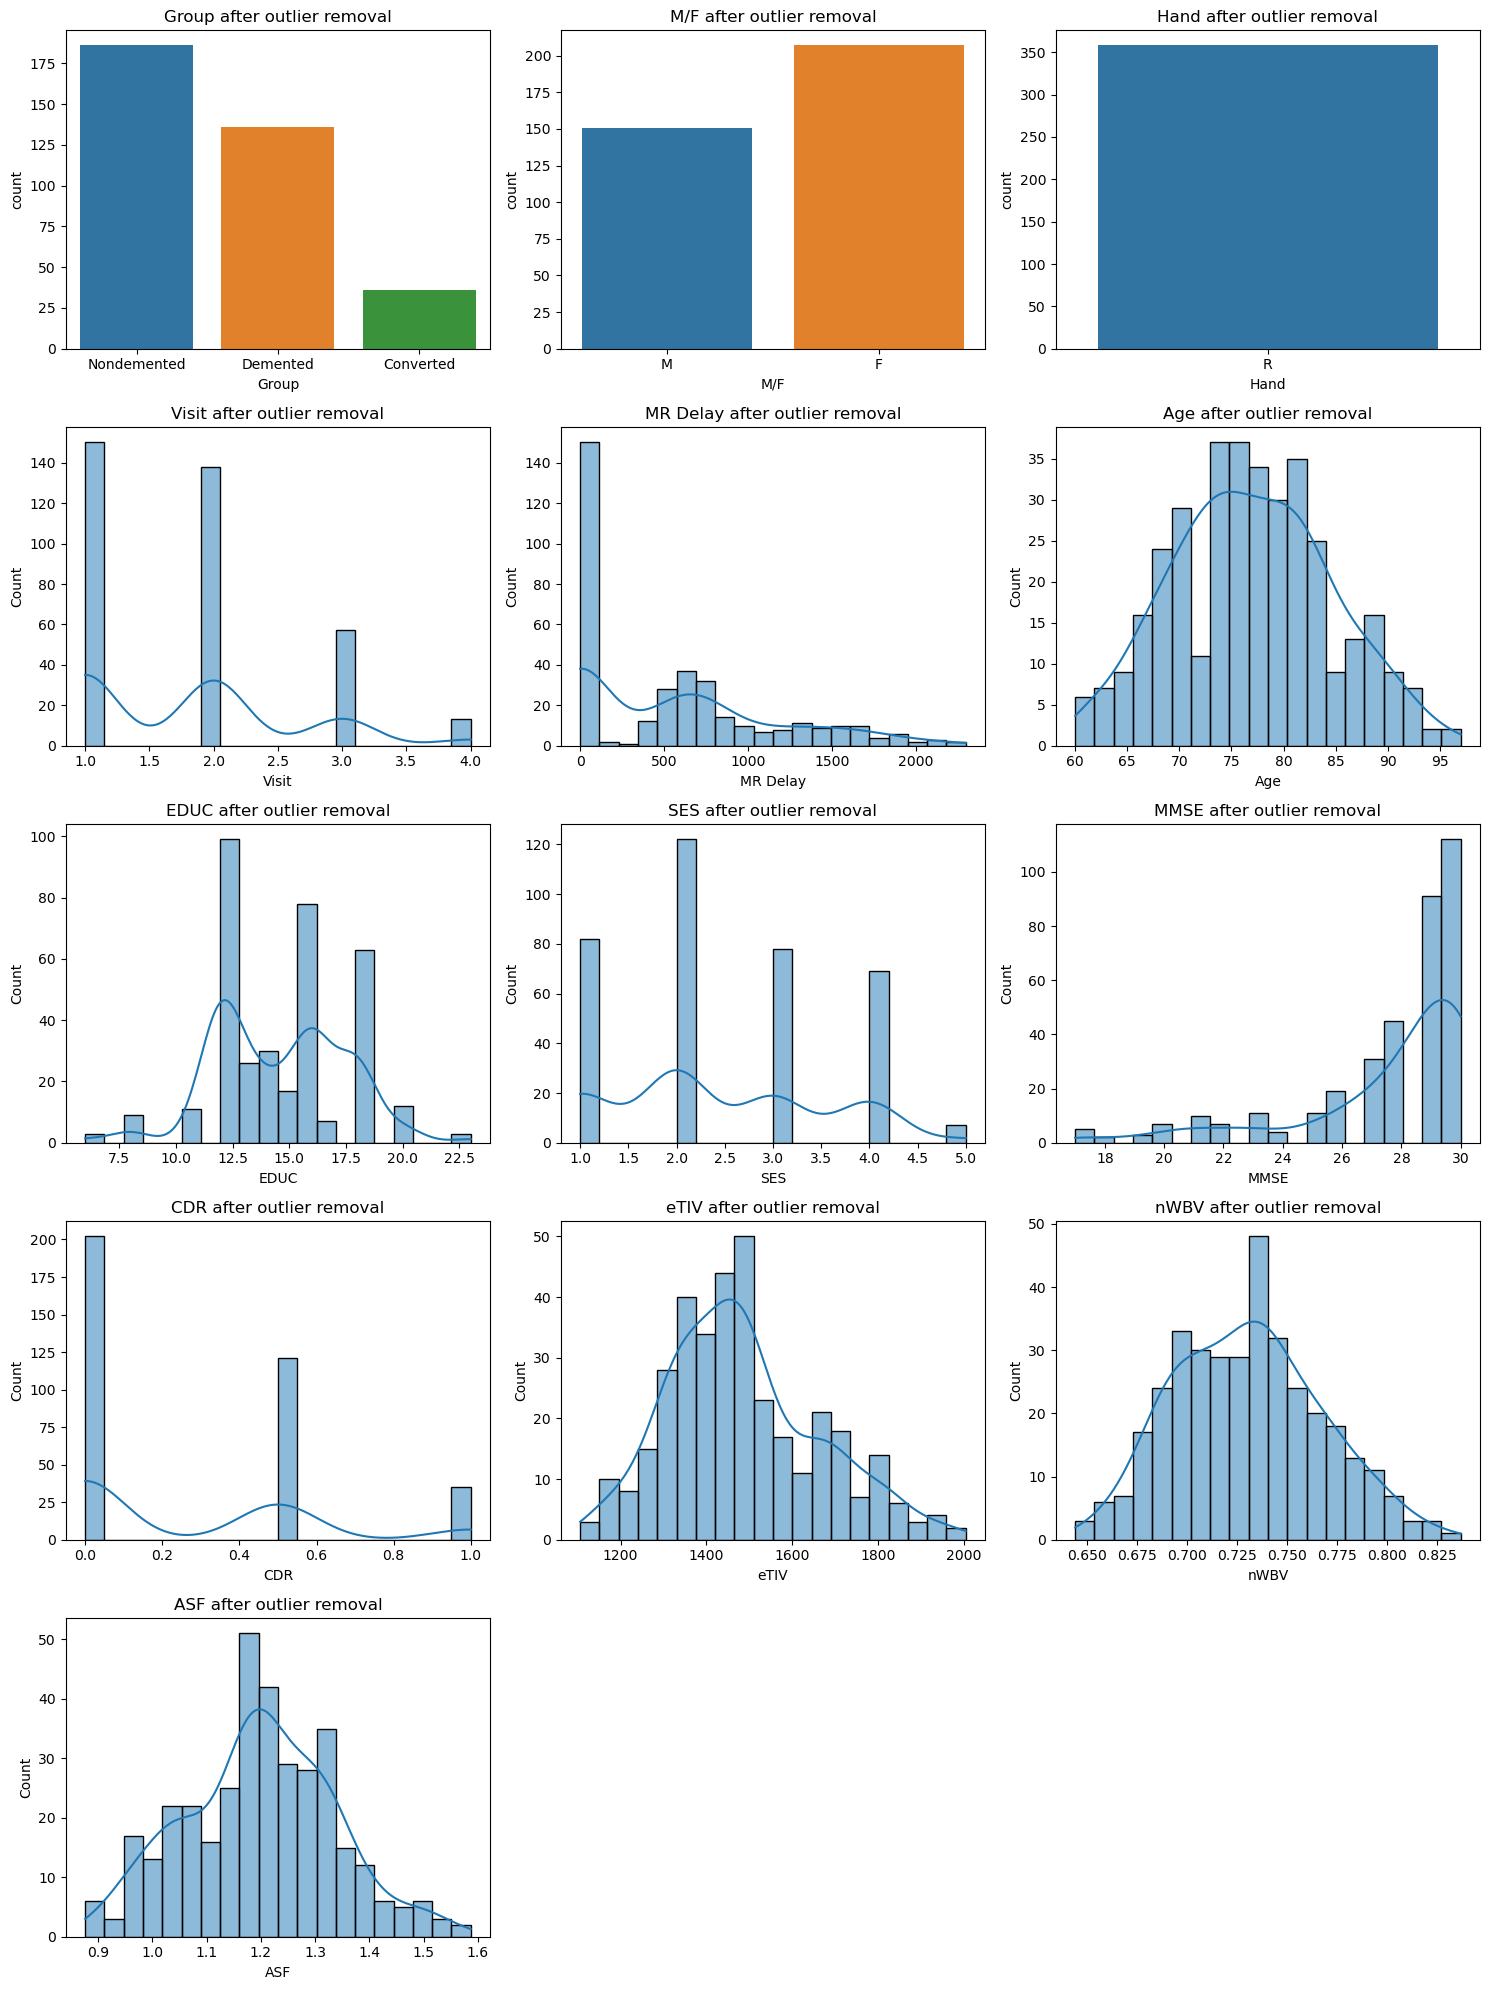

In [12]:
# Determine the number of rows and columns based on the total number of features
total_features = len(categorical_feat) + len(continuous_feat)
rows = math.ceil(total_features / 3)  # Assuming 3 columns

# Set up the figure
plt.figure(figsize=(15, 4 * rows))

# Plot histograms for categorical features
for i, feature in enumerate(categorical_feat, 1):
    plt.subplot(rows, 3, i)
    sns.countplot(x=feature, data=imputed_df)
    plt.title(f'{feature} after outlier removal')

# Plot histograms for continuous features
for i, feature in enumerate(continuous_feat, 1):
    plt.subplot(rows, 3, i + len(categorical_feat))
    sns.histplot(imputed_df[feature], bins=20, kde=True)
    plt.title(f'{feature} after outlier removal')

# Adjust layout
plt.tight_layout()
plt.show()

# Accuracy Matrix and Random Forest Classifier

In [13]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Step 3: Build Classifier
X_continuous = imputed_df[continuous_feat]
X_categorical = imputed_df[categorical_feat]

# One-hot encode categorical features
encoder = OneHotEncoder()
X_categorical_encoded = encoder.fit_transform(X_categorical).toarray()

# Concatenate continuous and encoded categorical features
X = np.concatenate((X_continuous, X_categorical_encoded), axis=1)

y = df.loc[imputed_df.index, 'Group']  # Target variable with consistent indices

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
classifier.fit(X_train, y_train)

# Step 4: Evaluate the Classifier
y_pred = classifier.predict(X_test)

# Print classification report and confusion matrix
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Optionally, you can also check accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.2%}")


Classification Report:
              precision    recall  f1-score   support

   Converted       1.00      1.00      1.00        11
    Demented       1.00      1.00      1.00        29
 Nondemented       1.00      1.00      1.00        32

    accuracy                           1.00        72
   macro avg       1.00      1.00      1.00        72
weighted avg       1.00      1.00      1.00        72


Confusion Matrix:
[[11  0  0]
 [ 0 29  0]
 [ 0  0 32]]

Accuracy: 100.00%


In [14]:
# Function to get user input for continuous and categorical features
def get_user_input():
    user_input = {}
    
    # Continuous features
    for feature in continuous_feat:
        user_input[feature] = float(input(f"{feature}: "))
    
    # Categorical features
    for feature in categorical_feat:
        user_input[feature] = input(f"{feature}: ")

    return user_input

# Get user input
user_input = get_user_input()

# Convert user input to DataFrame
user_df = pd.DataFrame([user_input])

# Print User Input
print("\nUser Input:")
print(user_df.to_string(index=False))

# Handle missing values in user input for continuous features
user_df[continuous_feat] = user_df[continuous_feat].apply(pd.to_numeric, errors='coerce')
user_df[continuous_feat].fillna(user_df[continuous_feat].mean(), inplace=True)

# Print User DataFrame after handling missing values for continuous features
print("\nUser DataFrame after handling missing values for continuous features:")
print(user_df.to_string(index=False))

# Identify outliers in user input for continuous features
user_input_continuous = user_df[continuous_feat].apply(pd.to_numeric, errors='coerce')
user_input_continuous.fillna(user_input_continuous.mean(), inplace=True)

outliers_continuous = (np.abs(zscore(user_input_continuous)) >= outlier_threshold).any(axis=1)
user_df['Outlier'] = outliers_continuous

# Print User DataFrame with Outliers Identified for continuous features
print("\nUser DataFrame with Outliers Identified for continuous features:")
print(user_df.to_string(index=False))

# One-hot encode categorical features
user_categorical_encoded = encoder.transform(user_df[categorical_feat]).toarray()

# Concatenate continuous and encoded categorical features
user_input_combined = np.concatenate((user_df[continuous_feat], user_categorical_encoded), axis=1)

# Predict the probability of Alzheimer's
probability_alzheimer = classifier.predict_proba(user_input_combined)[:, 1]
print(f"\nProbability of Alzheimer's: {probability_alzheimer[0]:.2%}")


Visit: 2
MR Delay: 457
Age: 75
EDUC: 13
SES: 2
MMSE: 28
CDR: 0.5
eTIV: 1980
nWBV: 0.696
ASF: 0.800
Group: Demented
M/F: M
Hand: R

User Input:
 Visit  MR Delay  Age  EDUC  SES  MMSE  CDR   eTIV  nWBV  ASF    Group M/F Hand
   2.0     457.0 75.0  13.0  2.0  28.0  0.5 1980.0 0.696  0.8 Demented   M    R

User DataFrame after handling missing values for continuous features:
 Visit  MR Delay  Age  EDUC  SES  MMSE  CDR   eTIV  nWBV  ASF    Group M/F Hand
   2.0     457.0 75.0  13.0  2.0  28.0  0.5 1980.0 0.696  0.8 Demented   M    R

User DataFrame with Outliers Identified for continuous features:
 Visit  MR Delay  Age  EDUC  SES  MMSE  CDR   eTIV  nWBV  ASF    Group M/F Hand  Outlier
   2.0     457.0 75.0  13.0  2.0  28.0  0.5 1980.0 0.696  0.8 Demented   M    R    False

Probability of Alzheimer's: 97.00%


C:\Users\shrey\AppData\Local\Temp\ipykernel_9972\1470545850.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_df[continuous_feat].fillna(user_df[continuous_feat].mean(), inplace=True)
C:\Users\shrey\AppData\Local\Temp\ipykernel_9972\1470545850.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_df[continuous_feat].fillna(user_df[continuous_feat].mean(), inplace=True)
C:\Users\shrey\AppData\Local\Temp\ipykernel_9972\1470545850.py:27: SettingWithCopyWarning: 
A value is trying to be set on a cop

# Adding Risk column to imputed and outlier dataset

In [15]:
# One-hot encode categoricals on full dataset 
X_categorical_full = encoder.transform(imputed_df[categorical_feat]).toarray()  

# Concatenate with continuous columns
X_full = np.concatenate((imputed_df[continuous_feat], X_categorical_full), axis=1)

# Now make predictions
y_pred_proba = classifier.predict_proba(X_full)[:,1]

# Rest of code remains same
risk_labels = ['Low' if prob < 0.5 else 'High' for prob in y_pred_proba]
imputed_df['Risk of Alzheimer'] = risk_labels

imputed_df

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF,Risk of Alzheimer
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1.0,0.0,M,R,87.0,14.0,2.0,27.0,0.0,1987.0,0.696,0.883,Low
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2.0,457.0,M,R,88.0,14.0,2.0,30.0,0.0,2004.0,0.681,0.876,Low
2,OAS2_0002,OAS2_0002_MR1,Demented,1.0,0.0,M,R,75.0,12.0,2.0,23.0,0.5,1678.0,0.736,1.046,High
3,OAS2_0002,OAS2_0002_MR2,Demented,2.0,560.0,M,R,76.0,12.0,2.0,28.0,0.5,1738.0,0.713,1.010,High
4,OAS2_0002,OAS2_0002_MR3,Demented,3.0,1895.0,M,R,80.0,12.0,2.0,22.0,0.5,1698.0,0.701,1.034,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,OAS2_0185,OAS2_0185_MR2,Demented,2.0,842.0,M,R,82.0,16.0,1.0,28.0,0.5,1693.0,0.694,1.037,High
369,OAS2_0185,OAS2_0185_MR3,Demented,3.0,2297.0,M,R,86.0,16.0,1.0,26.0,0.5,1688.0,0.675,1.040,High
370,OAS2_0186,OAS2_0186_MR1,Nondemented,1.0,0.0,F,R,61.0,13.0,2.0,30.0,0.0,1319.0,0.801,1.331,Low
371,OAS2_0186,OAS2_0186_MR2,Nondemented,2.0,763.0,F,R,63.0,13.0,2.0,30.0,0.0,1327.0,0.796,1.323,Low


In [16]:
#This was the original code to add the risk column to the outliers dataset
outliers_df = pd.read_csv('outliers_result.csv', na_filter=False) 

# One-hot encode categoricals on outliers_df
X_categorical_outliers = encoder.transform(outliers_df[categorical_feat]).toarray()

# Concatenate with continuous columns
X_outliers = np.concatenate((outliers_df[continuous_feat], X_categorical_outliers), axis=1)

# Now make predictions
y_pred_proba_outliers = classifier.predict_proba(X_outliers)[:, 1]

# Rest of the code remains the same
risk_labels_outliers = ['Low' if prob < 0.5 else 'High' for prob in y_pred_proba_outliers]
outliers_df['Risk of Alzheimer'] = risk_labels_outliers

# Display the resulting DataFrame
outliers_df

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF,Risk of Alzheimer
0,OAS2_0014,OAS2_0014_MR2,Demented,2.0,504.0,M,R,77.0,16.0,3.0,16.0,1.0,1590.0,0.696,1.104,High
1,OAS2_0017,OAS2_0017_MR5,Nondemented,5.0,2400.0,M,R,86.0,12.0,3.0,27.0,0.0,1813.0,0.761,0.968,Low
2,OAS2_0036,OAS2_0036_MR5,Nondemented,5.0,2369.0,F,R,75.0,13.0,4.0,29.0,0.0,1349.0,0.778,1.301,Low
3,OAS2_0037,OAS2_0037_MR4,Demented,4.0,2508.0,M,R,89.0,12.0,4.0,26.0,0.5,1485.0,0.706,1.181,High
4,OAS2_0044,OAS2_0044_MR2,Demented,2.0,352.0,M,R,69.0,14.0,4.0,15.0,1.0,1331.0,0.678,1.318,High
5,OAS2_0048,OAS2_0048_MR4,Demented,4.0,970.0,M,R,68.0,16.0,1.0,7.0,1.0,1714.0,0.682,1.024,High
6,OAS2_0048,OAS2_0048_MR5,Demented,5.0,1233.0,M,R,69.0,16.0,1.0,4.0,1.0,1701.0,0.676,1.032,High
7,OAS2_0070,OAS2_0070_MR5,Nondemented,5.0,2386.0,M,R,86.0,17.0,1.0,30.0,0.0,1720.0,0.705,1.020,Low
8,OAS2_0073,OAS2_0073_MR5,Nondemented,5.0,2517.0,F,R,77.0,14.0,3.0,29.0,0.0,1504.0,0.769,1.167,Low
9,OAS2_0079,OAS2_0079_MR2,Demented,2.0,584.0,F,R,71.0,12.0,4.0,16.0,1.0,1492.0,0.725,1.176,High


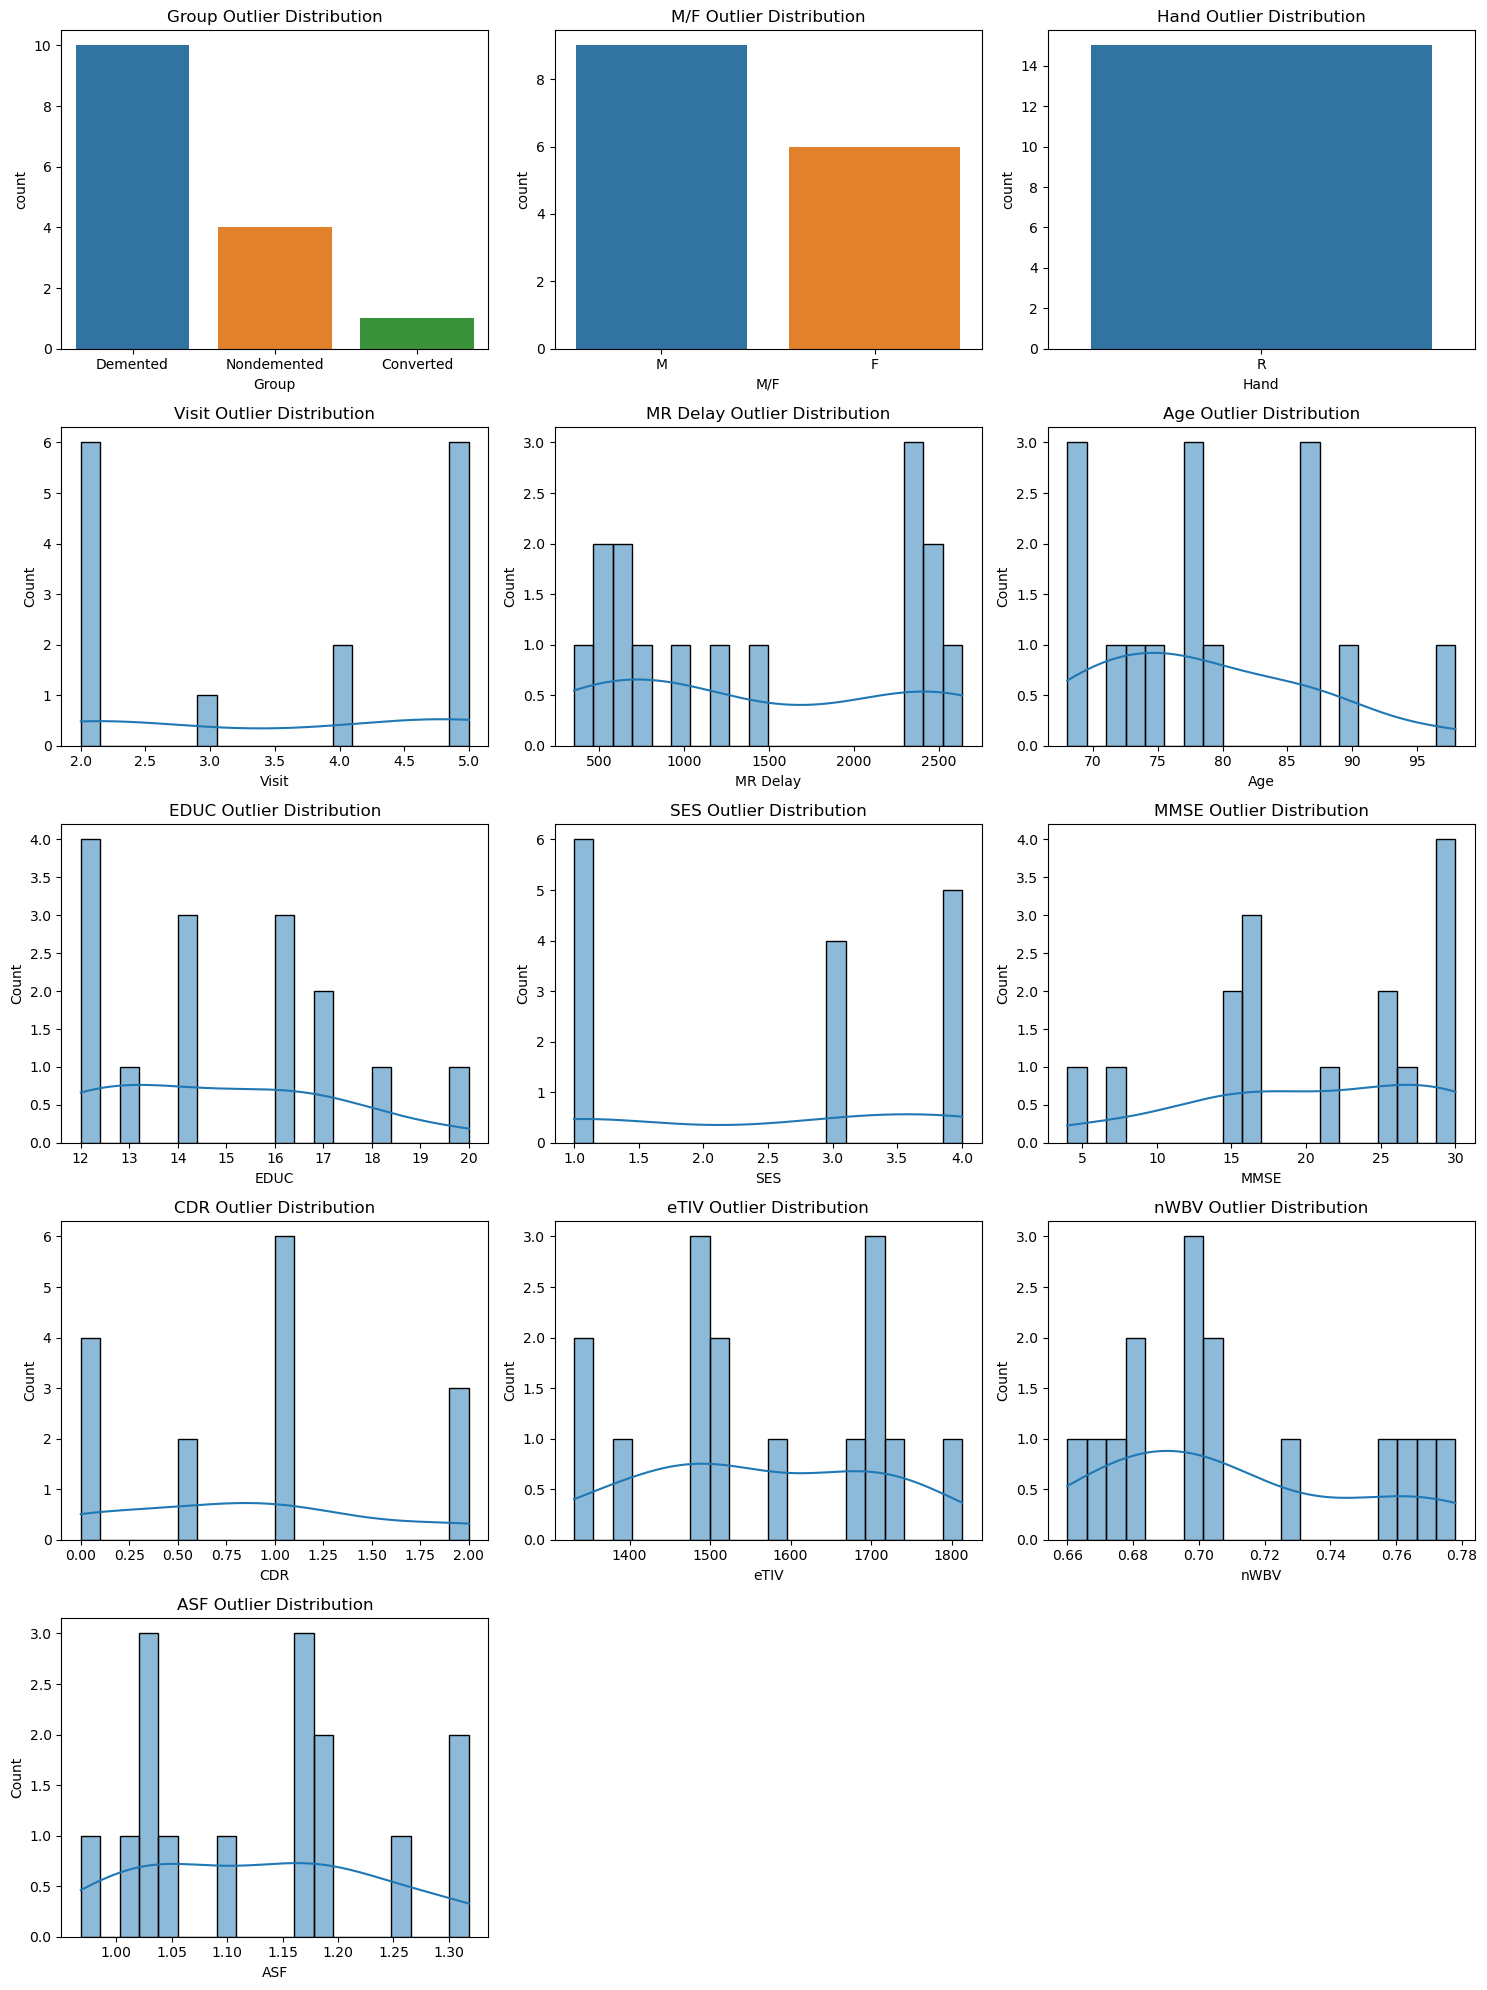

In [17]:
# Determine the number of rows and columns based on the total number of features
total_features = len(categorical_feat) + len(continuous_feat)
rows = math.ceil(total_features / 3)  # Assuming 3 columns

# Set up the figure
plt.figure(figsize=(15, 4 * rows))

# Plot histograms for categorical features
for i, feature in enumerate(categorical_feat, 1):
    plt.subplot(rows, 3, i)
    sns.countplot(x=feature, data=outliers_df)
    plt.title(f'{feature} Outlier Distribution')

# Plot histograms for continuous features
for i, feature in enumerate(continuous_feat, 1):
    plt.subplot(rows, 3, i + len(categorical_feat))
    sns.histplot(outliers_df[feature], bins=20, kde=True)
    plt.title(f'{feature} Outlier Distribution')

# Adjust layout
plt.tight_layout()
plt.show()

# Data Visualization for imputed and outlier datasets

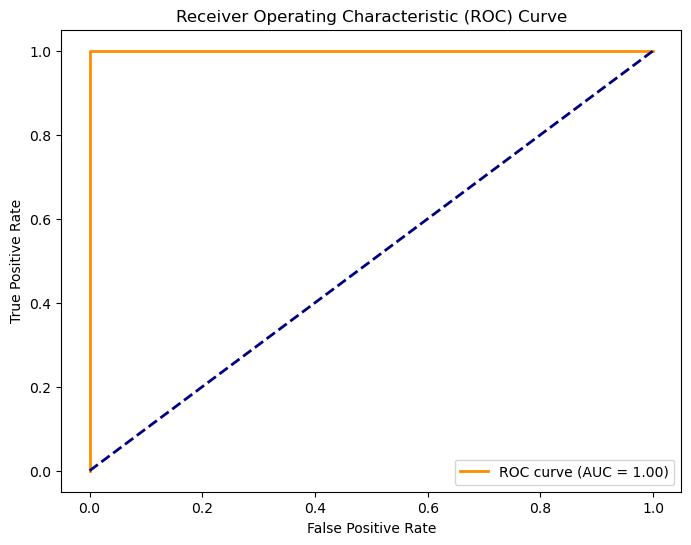

In [18]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# One-hot encode categoricals on full dataset  
X_categorical_full = encoder.transform(imputed_df[categorical_feat]).toarray()

# Concatenate continuous columns  
X_full = np.concatenate((imputed_df[continuous_feat], X_categorical_full), axis=1)

y_true = imputed_df['Group']
y_true = [1 if each == 'Demented' else 0 for each in y_true] 

# Get predicted probabilities for class 1 (Alzheimer's)
y_prob = classifier.predict_proba(X_full)[:, 1]  

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_true, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--') 
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

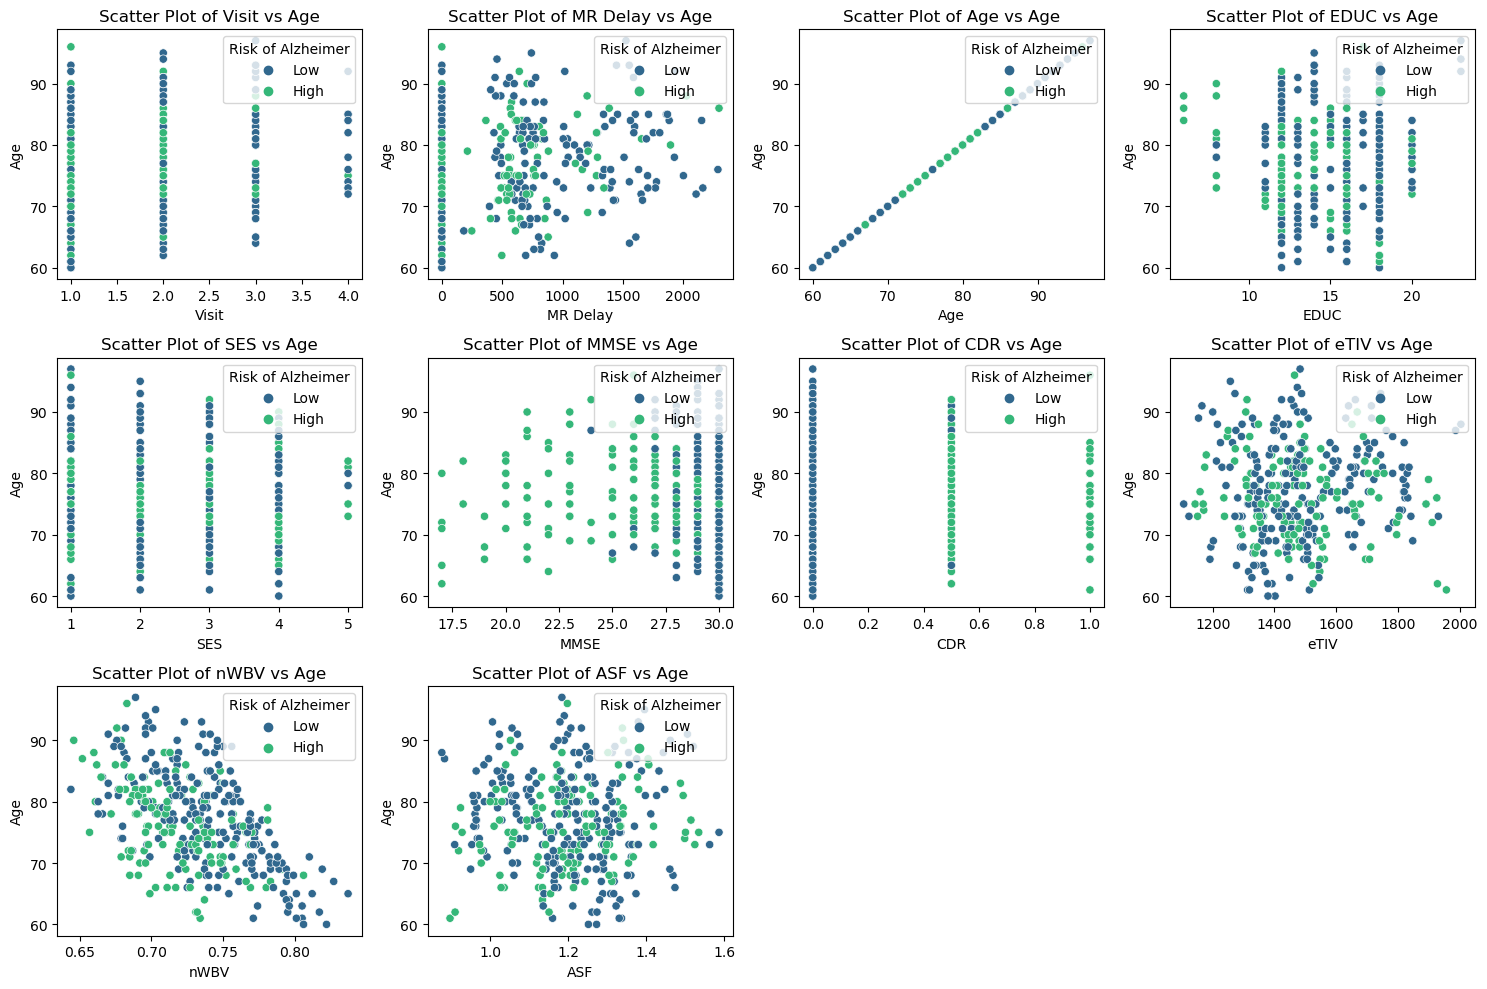

In [19]:
plt.figure(figsize=(15, 10))

for i, feat in enumerate(continuous_feat):
    plt.subplot(3, 4, i+1)
    sns.scatterplot(x=feat, y='Age', data=imputed_df, hue='Risk of Alzheimer', palette='viridis')
    plt.title(f'Scatter Plot of {feat} vs Age')
    plt.xlabel(feat)
    plt.ylabel('Age')
    plt.legend(title='Risk of Alzheimer', loc='upper right')

plt.tight_layout()
plt.show()


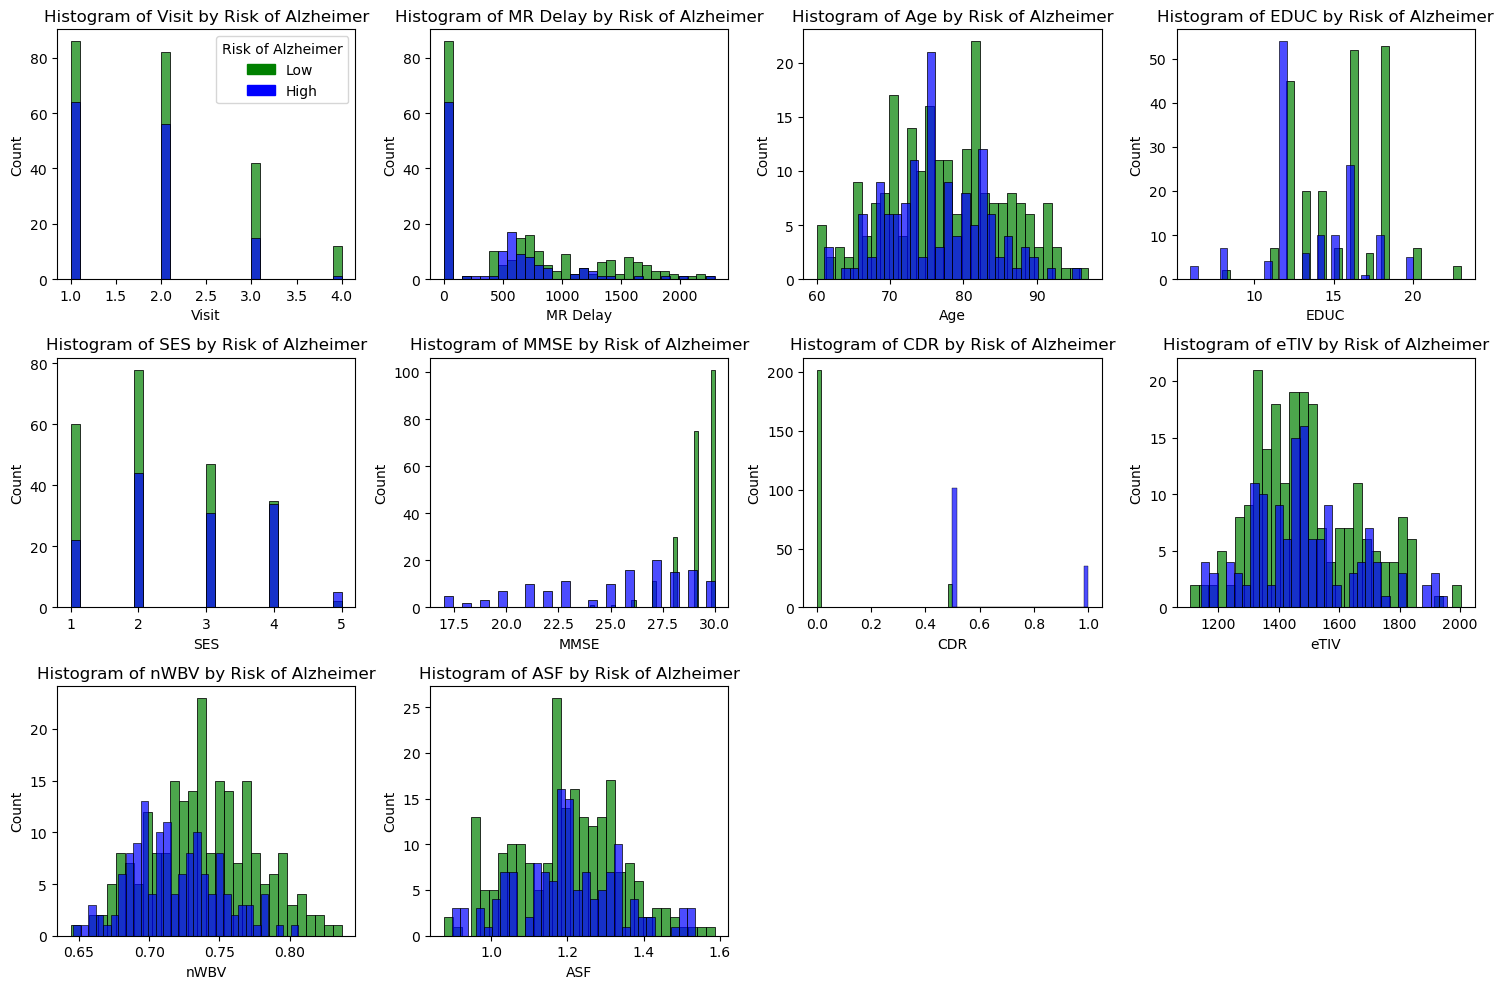

In [20]:
from matplotlib.patches import Patch

colors = ['green', 'blue']

plt.figure(figsize=(15, 10))

for i, feat in enumerate(continuous_feat):
    plt.subplot(3, 4, i + 1)
    
    for j, risk_level in enumerate(imputed_df['Risk of Alzheimer'].unique()):
        subset = imputed_df[imputed_df['Risk of Alzheimer'] == risk_level]
        sns.histplot(x=feat, data=subset, color=colors[j], label=risk_level, bins=30, alpha=0.7)

    plt.title(f'Histogram of {feat} by Risk of Alzheimer')
    plt.xlabel(feat)
    plt.ylabel('Count')
    
    # Create a custom legend for each subplot
    if i == 0:
        plt.legend(handles=[Patch(color=color, label=risk_level) for color, risk_level in zip(colors, imputed_df['Risk of Alzheimer'].unique())], title='Risk of Alzheimer', loc='upper right')
    else:
        plt.legend().set_visible(False)

plt.tight_layout()
plt.show()

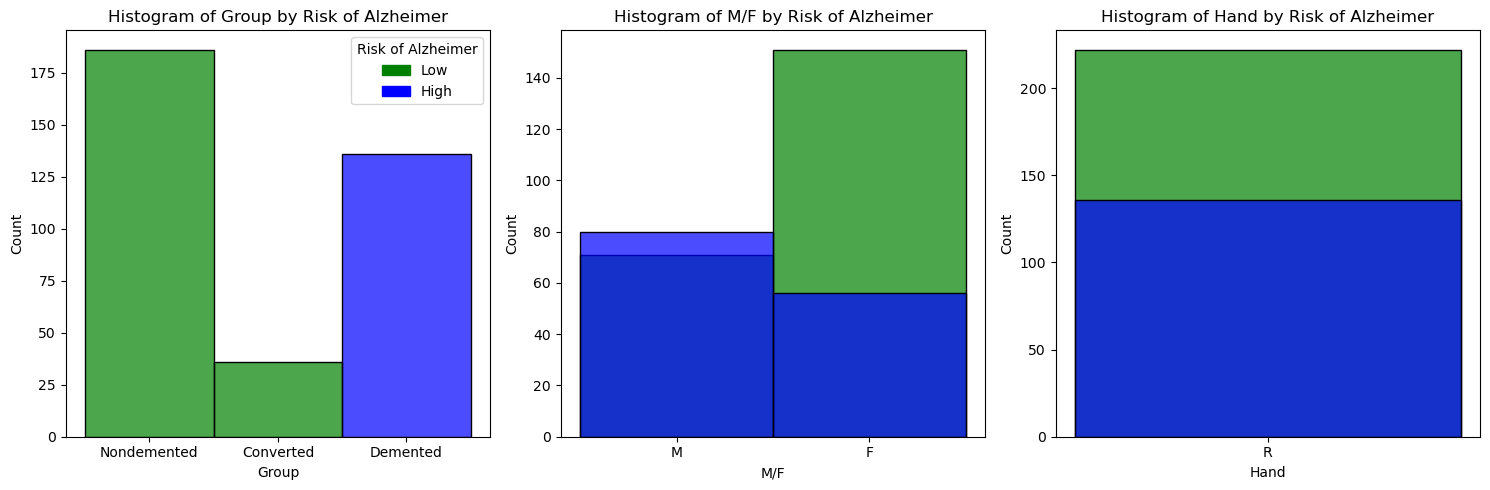

In [21]:
plt.figure(figsize=(15, 5))

for i, feat in enumerate(categorical_feat):
    plt.subplot(1, 3, i + 1)
    
    for j, risk_level in enumerate(imputed_df['Risk of Alzheimer'].unique()):
        subset = imputed_df[imputed_df['Risk of Alzheimer'] == risk_level]
        sns.histplot(x=feat, data=subset, color=colors[j], label=risk_level, alpha=0.7, discrete=True, multiple='stack')

    plt.title(f'Histogram of {feat} by Risk of Alzheimer')
    plt.xlabel(feat)
    plt.ylabel('Count')
    
    # Create a custom legend for each subplot
    if i == 0:
        plt.legend(handles=[Patch(color=color, label=risk_level) for color, risk_level in zip(colors, imputed_df['Risk of Alzheimer'].unique())], title='Risk of Alzheimer', loc='upper right')
    else:
        plt.legend().set_visible(False)

plt.tight_layout()
plt.show()

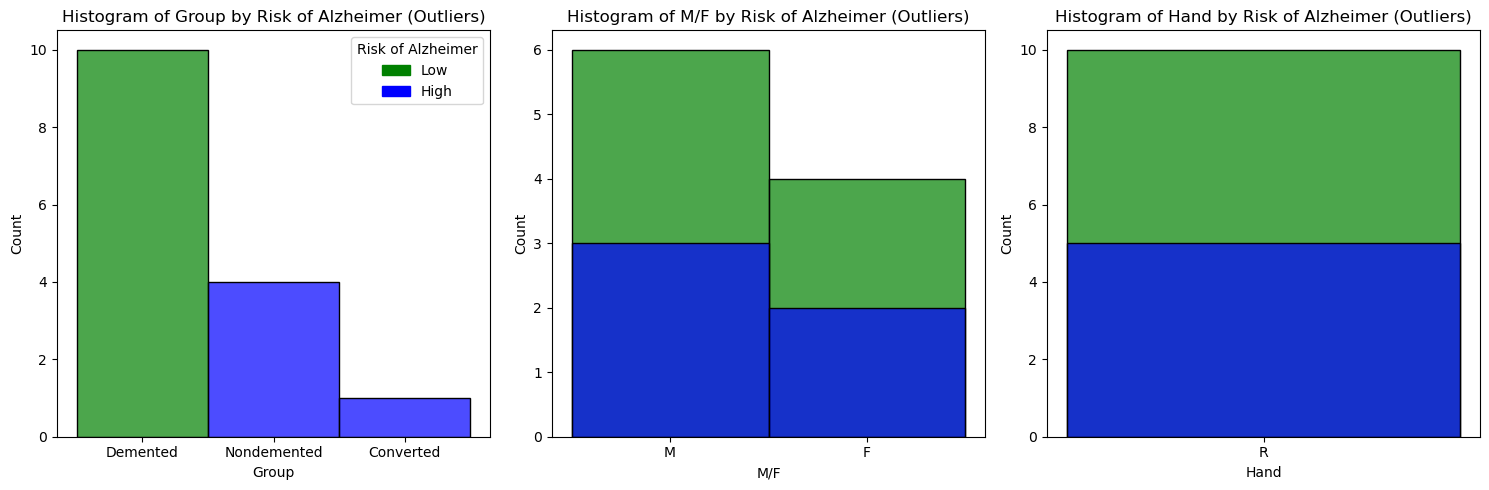

In [22]:
plt.figure(figsize=(15, 5))

for i, feat in enumerate(categorical_feat):
    plt.subplot(1, 3, i + 1)
    
    for j, risk_level in enumerate(outliers_df['Risk of Alzheimer'].unique()):
        subset = outliers_df[outliers_df['Risk of Alzheimer'] == risk_level]
        sns.histplot(x=feat, data=subset, color=colors[j], label=risk_level, alpha=0.7, discrete=True, multiple='stack')

    plt.title(f'Histogram of {feat} by Risk of Alzheimer (Outliers)')
    plt.xlabel(feat)
    plt.ylabel('Count')
    
    # Create a custom legend for each subplot
    if i == 0:
        plt.legend(handles=[Patch(color=color, label=risk_level) for color, risk_level in zip(colors, imputed_df['Risk of Alzheimer'].unique())], title='Risk of Alzheimer', loc='upper right')
    else:
        plt.legend().set_visible(False)

plt.tight_layout()
plt.show()

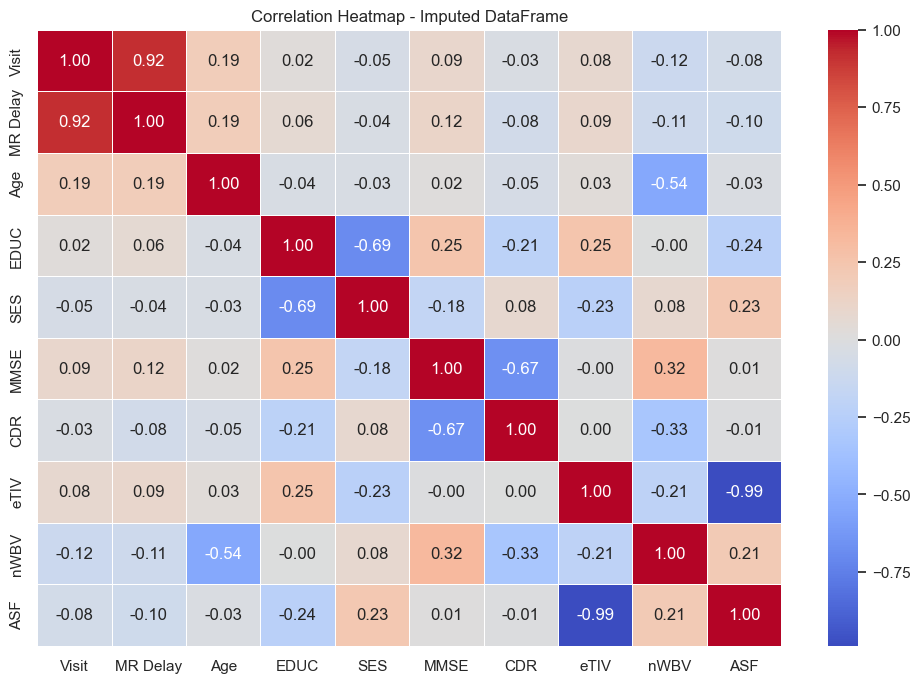

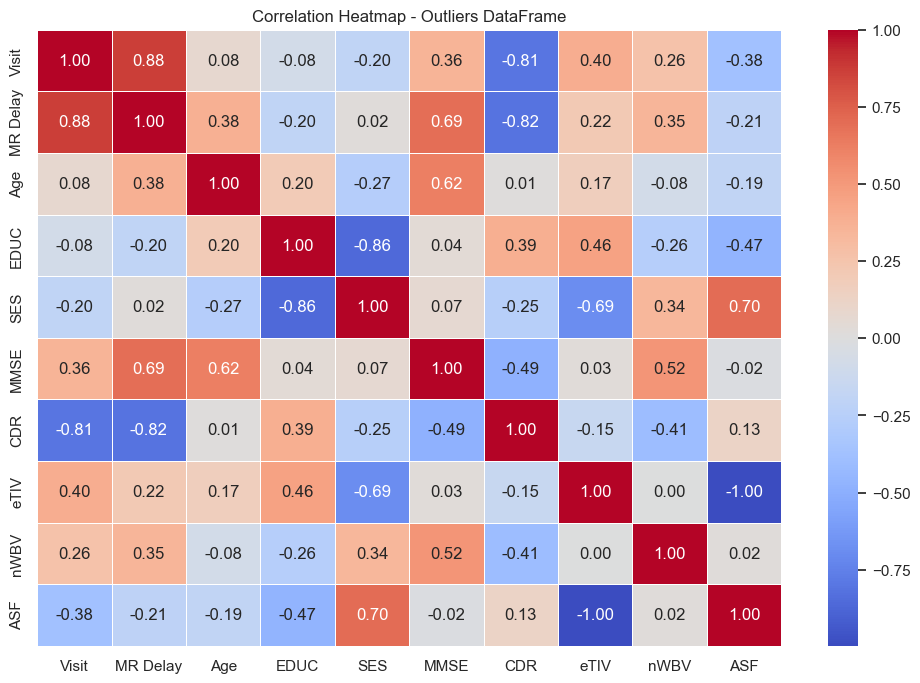

In [23]:
# Set the style of seaborn for better visualization
sns.set(style="whitegrid")

# Plot heatmap for imputed_df
plt.figure(figsize=(12, 8))
sns.heatmap(imputed_df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Correlation Heatmap - Imputed DataFrame")
plt.show()

# Plot heatmap for outliers_df
plt.figure(figsize=(12, 8))
sns.heatmap(outliers_df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Correlation Heatmap - Outliers DataFrame")
plt.show()